### AI Bootcamp - June 2024 Cohort - Analyzing and Predicting Flight Delays
Documentation and Context: See the project's ReadMe.md file for documentation on the column names and purposes.

### What's in this workbook?
This is a starter Jupyter Notebook for the project team to use when building out various machine learning models. Each team member will create a copy of this notebook for their work. 

## Libraries Imported
* Pandas
* Numpy
* Matplotlib
* sklearn
    * StandardScaler
    * PCA
    * LabelEncoder

In [1]:
# Do imports
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

### Read In Data to DataFrame

In [2]:
# Create DataFrame
df = pd.read_csv('./data/Airlines.csv')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [3]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [4]:
len(df['AirportFrom'].unique())

293

In [5]:
# Commenting out the time encoding since this gets formatted as a string and cannot be used for clustering
# df['Time_encoded'] = df['Time'].apply(lambda x: f"{x // 60:02d}:{x % 60:02d}")
# df.head()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


### Preprocessing: Encoding 'AirportFrom', 'AirportTo', 'Airline' Columns

In [7]:
airport_codes = df['AirportFrom'].unique()
airport_codes

array(['SFO', 'PHX', 'LAX', 'ANC', 'LAS', 'SLC', 'DEN', 'ONT', 'FAI',
       'BQN', 'PSE', 'HNL', 'BIS', 'IYK', 'EWR', 'BOS', 'MKE', 'GFK',
       'OMA', 'GSO', 'LMT', 'SEA', 'MCO', 'TPA', 'DLH', 'MSP', 'FAR',
       'MFE', 'MSY', 'VPS', 'BWI', 'MAF', 'LWS', 'RST', 'ALB', 'DSM',
       'CHS', 'MSN', 'JAX', 'SAT', 'PNS', 'BHM', 'LIT', 'SAV', 'BNA',
       'ICT', 'ECP', 'DHN', 'MGM', 'CAE', 'PWM', 'ACV', 'EKO', 'PHL',
       'ATL', 'PDX', 'RIC', 'BTR', 'HRL', 'MYR', 'TUS', 'SBN', 'CAK',
       'TVC', 'CLE', 'ORD', 'DAY', 'MFR', 'BTV', 'TLH', 'TYS', 'DFW',
       'FLL', 'AUS', 'CHA', 'CMH', 'LRD', 'BRO', 'CRP', 'LAN', 'PVD',
       'FWA', 'JFK', 'LGA', 'OKC', 'PIT', 'PBI', 'ORF', 'DCA', 'AEX',
       'SYR', 'SHV', 'VLD', 'BDL', 'FAT', 'BZN', 'RDM', 'LFT', 'IPL',
       'EAU', 'ERI', 'BUF', 'IAH', 'MCI', 'AGS', 'ABI', 'GRR', 'LBB',
       'CLT', 'LEX', 'MBS', 'MOD', 'AMA', 'SGF', 'AZO', 'ABE', 'SWF',
       'BGM', 'AVP', 'FNT', 'GSP', 'ATW', 'ITH', 'TUL', 'COS', 'ELP',
       'ABQ', 'SMF',

### Make a copy of the DataFrame for preprocessing

In [8]:
encoded_df = df.copy()

In [9]:
unique_codes = encoded_df['AirportFrom'].unique()
code_to_id = {code: idx for idx, code in enumerate(unique_codes, start=1)}

# Apply the mapping to create a new column with unique IDs
encoded_df['AirportFromIDs'] = encoded_df['AirportFrom'].map(code_to_id)
encoded_df['AirportToIDs'] = encoded_df['AirportTo'].map(code_to_id)

encoded_df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,AirportFromIDs,AirportToIDs
0,1,CO,269,SFO,IAH,3,15,205,1,1,103
1,2,US,1558,PHX,CLT,3,15,222,1,2,109
2,3,AA,2400,LAX,DFW,3,20,165,1,3,72
3,4,AA,2466,SFO,DFW,3,20,195,1,1,72
4,5,AS,108,ANC,SEA,3,30,202,0,4,22
...,...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,194,229
539379,539380,FL,398,SEA,ATL,5,1439,305,0,22,55
539380,539381,FL,609,SFO,MKE,5,1439,255,0,1,17
539381,539382,UA,78,HNL,SFO,5,1439,313,1,12,1


In [10]:
# Get unique airline codes
unique_airlines = encoded_df['Airline'].unique()

# Create a random mapping for each unique airline code
random.seed(42)  # Set a seed for reproducibility, remove if you want different random results each time
airline_to_id = {airline: random.randint(1000, 9999) for airline in unique_airlines}

# Apply the random mapping to the airline column
encoded_df['AirlineID'] = encoded_df['Airline'].map(airline_to_id)

encoded_df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,AirportFromIDs,AirportToIDs,AirlineID
0,1,CO,269,SFO,IAH,3,15,205,1,1,103,2824
1,2,US,1558,PHX,CLT,3,15,222,1,2,109,1409
2,3,AA,2400,LAX,DFW,3,20,165,1,3,72,5506
3,4,AA,2466,SFO,DFW,3,20,195,1,1,72,5506
4,5,AS,108,ANC,SEA,3,30,202,0,4,22,5012


In [11]:
len(encoded_df["AirportFrom"].unique())

293

In [12]:
# Drop all the categorical columns
encoded_df = encoded_df.drop(columns=['Airline', 'AirportFrom', 'AirportTo'])
encoded_df.head()

,id,Flight,DayOfWeek,Time,Length,Delay,AirportFromIDs,AirportToIDs,AirlineID
0,1,269,3,15,205,1,1,103,2824
1,2,1558,3,15,222,1,2,109,1409
2,3,2400,3,20,165,1,3,72,5506
3,4,2466,3,20,195,1,1,72,5506
4,5,108,3,30,202,0,4,22,5012


In [13]:
# Drop the id column since this is a hard-coded index
encoded_df = encoded_df.drop(columns=['id'])
encoded_df.head()

,Flight,DayOfWeek,Time,Length,Delay,AirportFromIDs,AirportToIDs,AirlineID
0,269,3,15,205,1,1,103,2824
1,1558,3,15,222,1,2,109,1409
2,2400,3,20,165,1,3,72,5506
3,2466,3,20,195,1,1,72,5506
4,108,3,30,202,0,4,22,5012


In [14]:
### Correlation

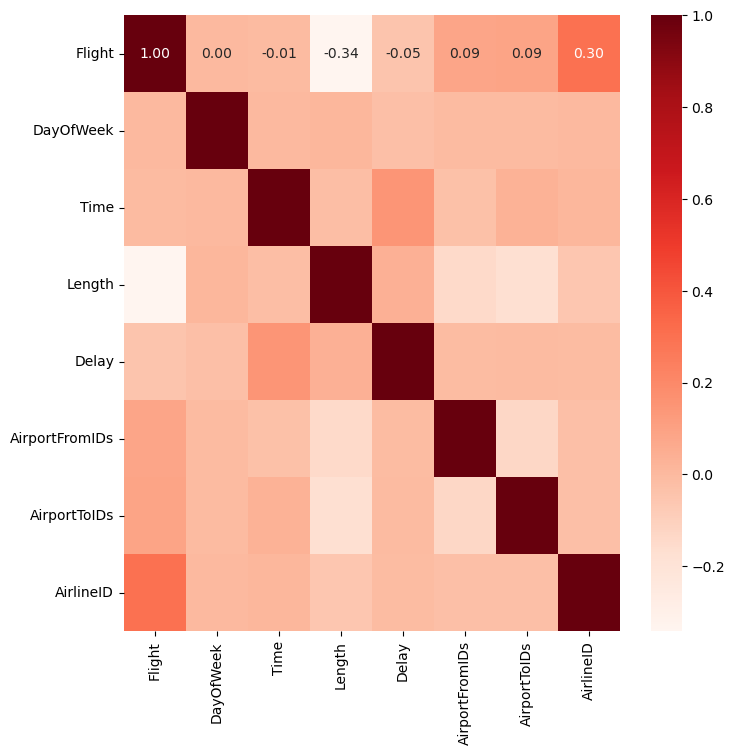

In [15]:
# Create a correlation matrix to see how features are related
plt.figure(figsize=(8,8))
cor = encoded_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

### Prepare the data for modeling

In [16]:
# Define X for training and testing and drop the Delay column since it's our target
X = encoded_df.copy()
X.drop('Delay', axis=1, inplace=True)
X.head()

,Flight,DayOfWeek,Time,Length,AirportFromIDs,AirportToIDs,AirlineID
0,269,3,15,205,1,103,2824
1,1558,3,15,222,2,109,1409
2,2400,3,20,165,3,72,5506
3,2466,3,20,195,1,72,5506
4,108,3,30,202,4,22,5012


In [17]:
# Define the Delay column as our target
y = df['Delay']

### Scale the Data
SVM, KNN, K-Means, and PCA need scaling

In [18]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
encoded_df['Delay'].value_counts()

Delay
0    299119
1    240264
Name: count, dtype: int64

In [19]:
# Define the Delay column as our target
y = df['Delay']

In [20]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [21]:
# Review the X_train DatFrame
X_train

,Flight,DayOfWeek,Time,Length,AirportFromIDs,AirportToIDs,AirlineID
113140,2275,2,875,125,45,72,5506
312072,5927,7,386,94,114,66,1488
69671,6982,7,449,63,161,66,9935
515510,961,4,841,137,23,63,9279
189955,1105,7,445,253,55,6,4657
...,...,...,...,...,...,...,...
256696,4263,3,1185,115,71,66,4811
481385,15,2,995,195,83,73,3286
495656,61,3,772,184,83,73,3286
235415,596,2,975,101,197,2,1409



Scale the Features
Use the StandardScaler to scale the features data. Remember that only X_train and X_test DataFrames should be scaled.

In [22]:
# Scaling the X train data by using StandardScaler()
# Create the StandardScaler instance
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.07331419, -1.00836708,  0.26004785, ..., -0.52926068,
        -0.10323667,  0.38564111],
       [ 1.694463  ,  1.60391063, -1.49869426, ...,  0.56376233,
        -0.19822869, -1.23114233],
       [ 2.20514343,  1.60391063, -1.27210786, ...,  1.30828525,
        -0.19822869,  2.16780484],
       ...,
       [-1.14501701, -0.48591154, -0.11040295, ...,  0.07269402,
        -0.08740467, -0.50765387],
       [-0.88604636, -1.00836708,  0.61970881, ...,  1.87855812,
        -1.21147693, -1.26293076],
       [-1.16195901, -0.48591154, -1.35842649, ..., -0.08571511,
         0.07091537, -0.50765387]])

In [23]:
# Scale X test data by using StandardScaler()
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 2.60207039, -0.48591154,  0.31399699, ...,  2.29042187,
        -1.14814891,  2.16780484],
       [ 0.80186137, -1.00836708,  0.60891898, ...,  1.70430808,
         0.83085155, -0.85450985],
       [ 0.22002452,  0.55899955, -0.18952836, ...,  1.41917164,
        -1.21147693, -0.8098451 ],
       ...,
       [-0.64401772,  0.55899955, -1.52027392, ...,  2.02112634,
        -0.19822869,  0.38564111],
       [ 1.25058247,  1.60391063,  0.71681727, ..., -0.37085155,
         1.19498763, -1.21826601],
       [ 0.12321307, -1.00836708,  1.37499683, ...,  1.48253529,
         0.40338745,  0.04401614]])

In [24]:
# Check the max and min of the scaled training and testing sets

print("Scaled data min/max (StandardScaler):")
print("Training data min:",X_train_scaled.min())
print("Training data max:",X_train_scaled.max())
print("Testing data min:",X_test_scaled.min())
print("Testing data max:",X_test_scaled.max())

Scaled data min/max (StandardScaler):
Training data min: -2.8510194842514363
Training data max: 7.457710151337992
Testing data min: -2.8510194842514363
Testing data max: 7.457710151337992


Model and Fit to a Logistic Regression Classifier

In [25]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression()

# Fit the model to the training data
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {lr_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.5699775298674782
Testing Data Score: 0.5692790294113285


k: 1, Train/Test Score: 0.805/0.594
k: 3, Train/Test Score: 0.787/0.607
k: 5, Train/Test Score: 0.744/0.615
k: 7, Train/Test Score: 0.720/0.619
k: 9, Train/Test Score: 0.707/0.624
k: 11, Train/Test Score: 0.699/0.627
k: 13, Train/Test Score: 0.692/0.629
k: 15, Train/Test Score: 0.687/0.631
k: 17, Train/Test Score: 0.683/0.633
k: 19, Train/Test Score: 0.680/0.634


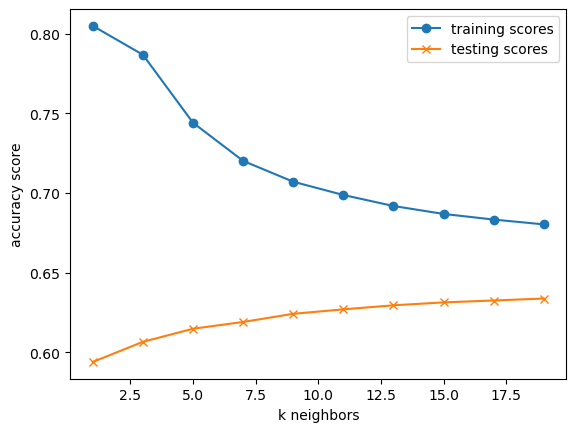

In [27]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [28]:
# Train the KNN model with the best k value
# Note that k: 9 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.624
